LEGI: 20-945-721

# SLT-CE-2: Deterministic Annealing

### References

<ol>
<li> Sections II.A.1 (principled derivation of deterministic annealing) and II.A.3 (Mass-constrained clustering) of 'Deterministic annealing for clustering, compression, classification, regression, and related optimization problems', Kenneth Rose, 1998, http://ieeexplore.ieee.org/document/726788/ 
</li>

<li>
The wine data set, http://www3.dsi.uminho.pt/pcortez/wine5.pdf
</li>
    
</ol>

### Setup 

In [1]:
import sklearn as skl
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import sklearn.svm as svm
from sklearn import cluster

import pandas as pd
import numpy as np

from treelib import Tree

import matplotlib.pyplot as plt
from matplotlib import cm

<h2 style="background-color:#f0b375;">
Section 4.0
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.0 </span>
</h2>

<p style="background-color:#adebad;">
    For this exercise, it is of utmost importance to read reference [1] about deterministic annealing clustering (DAC). Our implementation will be based on this reference. Please shortly summarize what they refer to as the <i>preferred implementation</i> of the DAC algorithm.
</p>

### Sketch
- 0. **Set limits**:
    - Number of codevectors $\leftarrow K_{max}$
    - Minimum temperature $\leftarrow T_{min}$

- 1. **Initialize**:
    - $T>2 \lambda_{max}(C_x)$
    - $K=1$
    - $y_1= \sum_{x} xp(x)$
    - $p(y_1)=1$

- 2. **Update** for $i=1,\ldots,K$:
    - $y_i= \dfrac{\sum_x x p(x) p(y_i|x)}{p(y_i)}$
- 3. **Convergence Test**:
    - If failed return to 3.
- 4. **Check T**:
    - If $T \leq T_{min}$ perform last iteration for $T=0$ and STOP
- 5. **Cooling Step**:
    - $T \leftarrow \alpha T, (\alpha < 1)$
- 6. **New codevector**:
    - If $K < K_{max}$ check condition for phase transition for $i=1,\ldots,K$
    - If critical $T$ is reached for cluster add a new codevector $y_{K+1}$
    - Return to 2.

<p style="background-color:#adebad;">
    In order to avoid headaches with numerical instabilities, we first try our algorithm on a simple artificially generated data as below. Run the bloc below to have a look at the data. Later when we have everything implemented, we will examine some real world data. 
</p>

/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5, 1.0, 'Test data')

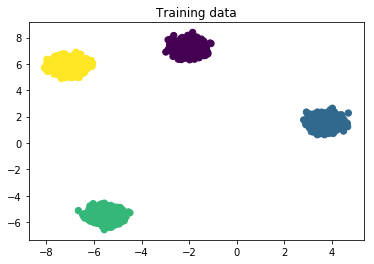

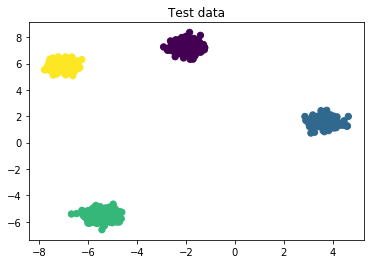

In [2]:
n_clusters = 4
ran_s = 42

# Generate artificial dataset
X, y_true = make_blobs(n_samples=7000, centers=4,
                       cluster_std=0.3, random_state=ran_s,
                       center_box=(-8.0, 8.0),
                       shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_true, train_size=6000, random_state=42)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap='viridis')
plt.title("Training data")

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap='viridis')
plt.title("Test data")

<p style="background-color:#adebad;">
    Implement the <b>fit method</b> for the template class DeterministicAnnealing, according to the contract outlined in its docstring. (The template class DeterministicAnnealing is in file <b>DA.py</b> which you can open in your favourite IDE) For the implementation, it may help to take a look at both <b>get_distance method</b> and <b>fit _calculate_cluster_probs method</b> and implement them as well. Of course you are free to change all these methods or/and write additional methods for your purpose.
    You can add more class methods as necessary.
    See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for complementary information.
</p>
<p style="background-color:#adebad;">
    While implementing, you can run the bloc below to test your implementation.
</p>

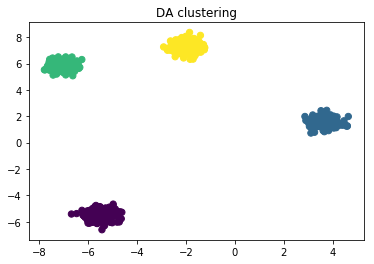

In [7]:
from DA import DeterministicAnnealingClustering

DAC = DeterministicAnnealingClustering(
    n_clusters=4, random_state=ran_s)
DAC.fit(X_train)
y_DAC = DAC.predict(X_test)
y_DAC_hard = np.argmax(y_DAC, axis=1)
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_DAC_hard, s=40, cmap='viridis')
plt.title("DA clustering")
plt.show()



<h2 style="background-color:#f0b375;">
Section 4.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points. Note that you can have a maximum of 6 points at the end.</span>
</h2>

<p style="background-color:#adebad;">
    In this section we implement a plot which will help us better understand the DA method, and could also be a help for better debugging of your implementation.
    
 <ul style="background-color:#adebad;">
        <li> 
            Modify your implementation of <b>fit</b> function such that <b>plot_phase_diagram</b> method will produce a plot similar to the phase diagram plot shown in Figure 2 of the reference paper.
        </li>
</ul>  
</p>

<ul style="background-color:#adebad;">
            For this, extend DAC.fit to save the expected distortion during annealing as an additional attribute self.distortion.
            You might also want to save the number of effective clusters and the temperature along the way.
    </ul>
</p>

#### extend DAC.fit(self, X):
    # ...
    # Save information for each (n-th) annealing step:
    # self.distortion = [d0, d1, d2, ...]
    # self.n_eff_clusters = [e0, e1, e2, ...]
    # self.temp = [t0, t1, t2, ...]
    # ...

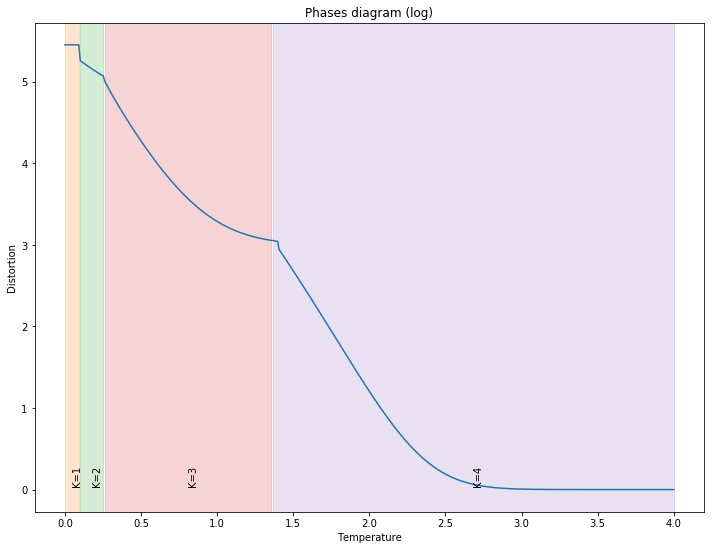

In [8]:
DAC.plot_phase_diagram()

<h2 style="background-color:#f0b375;">
Section 5.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
Here we implement another plot which helps better undetrstad the dynamics of the algorithm.
        <li>
        Implement DAC.plot_bifurcation, which should create a bifurcation plot.<br>
        Modify DAC.fit to keep track of the distances, using the tree object DAC.bifurcation_tree. When a cluster splits, it creates two child nodes. Each node should store its centroid vector, and the distance to the parent centroid vector. After splitting, the parent node is not updated anymore.<br>
        In the bifurcation plot, the horizontal distance of a child node to its parent node should be exactly the distance to the parent centroid vector. The two child nodes should move in opposite directions, i.e. one to the left of the parent and one to the right.
        </li>
</ul>

This section could bit a bit annoying, you can also jump to the next sections and come back here later. 

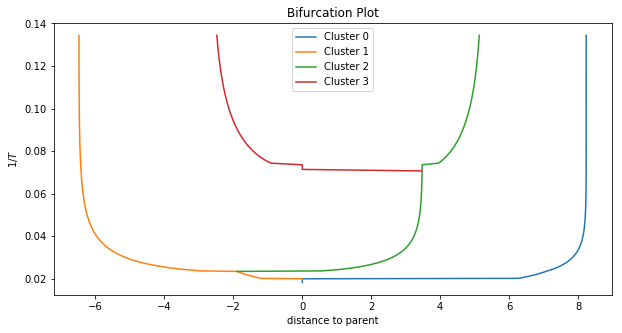

In [10]:
DAC.plot_bifurcation(cut_idx=200)

<h2 style="background-color:#f0b375;">
Section 5.5
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>

<p style="background-color:#adebad;">
Now we are ready to use some real world data. This might need some tweaking and handling of numberical instabilities. Please make sure your understand the data.
</p>

<p style="background-color:#adebad;">
Read the wine data [3], which contains 11 physiochemical attributes, and two labels (quality and color).
</p>

<p style="background-color:#adebad;">
    Create an instance of your DAC class with n_clusters = 2 and <b>fit the first 6000 samples</b> of the wine data set. Record the execution time. Furthermore, create an instance of the sklearn k-means class, and fit it with the same parameters. Again record the execution time. Make sure that the hyper parameters (initial temperature, min temperature, convergence criteria, noise, etc.) make sense and lead to a reasonable clustering
</p>

In [11]:
from DA import read_data_csv
X, y = read_data_csv("wine-data.csv", y_names=["quality", "color"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["color"], train_size=6000, random_state=42)

X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X, y["quality"], train_size=6000, random_state=42)

/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
%%time
DAC = DeterministicAnnealingClustering(n_clusters=2, random_state=42,convergence_em=1e-4,alpha=0.9,T_min=220)
DAC.fit(X_train)

CPU times: user 30.6 s, sys: 3.68 s, total: 34.3 s
Wall time: 7.07 s


In [13]:
%%time
kmeans = cluster.KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

CPU times: user 459 ms, sys: 112 ms, total: 571 ms
Wall time: 94.3 ms


In [14]:
%%time
y_kmeans = kmeans.predict(X_test)

CPU times: user 2.5 ms, sys: 1.66 ms, total: 4.16 ms
Wall time: 1.26 ms


In [15]:
%%time
y_DAC = DAC.predict(X_test)

CPU times: user 1.2 ms, sys: 779 µs, total: 1.98 ms
Wall time: 1.58 ms


<h2 style="background-color:#f0b375;">
Section 6.0
<span style=font-size:50%> Complete all problems in this section to get an additional (+0.5) point to the previous points.</span>
</h2>
<ul style="background-color:#adebad;">
<li> Before we can compute the confusion matrix, we need to perform some post-processing on the DAC cluster assignments.
    Explain what the function postprocess (defined below) does, and why we need it. To do so, complete the docstring of the function postprocess.
        </li>
</ul>

In [16]:
def postprocess(y_DAC, y_kmeans):
    """
    For each cluster compute the most probable assignment (fuzzy) and
    check the corresponding assignment in k_means. Then, use the k_means 
    assignments to map DAC clusters in k_means clusters. 
        
    We need this function because clusters are invariant to permutation, this means that k_means could 
    assign a different order to its clusters and we need to make sure that the cluster ordering is the same
    if we want to compare the two methods.
    """
    
    y_DAC_hard = np.argmax(y_DAC, axis=1)
    
    n_clusters = len(np.unique(y_DAC_hard))
    dac2kmeans = []
    for cluster in range(n_clusters):
        argmax = np.argmax(y_DAC[:, cluster])
        dac2kmeans.append(y_kmeans[argmax])
        
    y_DAC_new = []
    for dac_label in y_DAC_hard:
        y_DAC_new.append(dac2kmeans[dac_label])
        
    return np.array(y_DAC_new)

In [17]:
skl.metrics.confusion_matrix(y_kmeans, postprocess(y_DAC, y_kmeans))

array([[288,   0],
       [  3, 206]])

</h2>

<ul style="background-color:#adebad;">
        <li> Read the docstring of <b>transform method</b> and understand what it does.
        </li>
        <li>
        Use DAC.transform and kmeans.transform to transform both, X_train and X_test. 
        </li>
       
</ul>

In [18]:
X_train_DAC = DAC.transform(X_train)
X_test_DAC = DAC.transform(X_test)

X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

<ul style="background-color:#adebad;">
        <li>
        Fit an SVM classifier with default parameters to the untransformed data, and to the transformed data.
        Compare the performance of predicting whether the color of a wine is red or white.
        </li>
    </ul>

In [19]:
svm_ = svm.SVC(random_state=42)
svm_.fit(X_train, y_train)
svm_.score(X_test, y_test)

/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9436619718309859

In [20]:
svm_DAC = svm.SVC(random_state=42)
svm_DAC.fit(X_train_DAC, y_train)
svm_DAC.score(X_test_DAC, y_test)

/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9114688128772636

In [21]:
svm_K = svm.SVC(random_state=42)
svm_K.fit(X_train_kmeans, y_train)
svm_K.score(X_test_kmeans, y_test)

/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/slt-ce/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9094567404426559

<ul style="background-color:#adebad;">
        <li>
        Produce two scatter plots, one for X_train_DAC and one for X_train_kmeans.<br>
        Make the marker color indicate the wine color.
        </li>
    </ul>

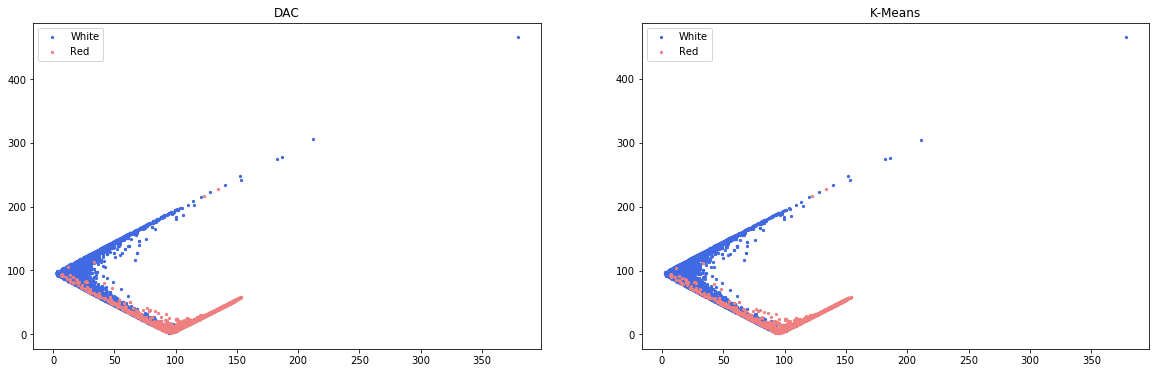

In [22]:
white = y_train == 'white'
red = y_train == 'red'

# masked X_train_DAC
x_dac_white_0 = X_train_DAC[:,0].reshape(-1,1)[white]
x_dac_white_1 = X_train_DAC[:,1].reshape(-1,1)[white]
x_dac_red_0 = X_train_DAC[:,0].reshape(-1,1)[red]
x_dac_red_1 = X_train_DAC[:,1].reshape(-1,1)[red]

# masked X_train_kmeans
x_kmeans_white_0 = X_train_kmeans[:,0].reshape(-1,1)[white]
x_kmeans_white_1 = X_train_kmeans[:,1].reshape(-1,1)[white]
x_kmeans_red_0 = X_train_kmeans[:,0].reshape(-1,1)[red]
x_kmeans_red_1 = X_train_kmeans[:,1].reshape(-1,1)[red]

fig = plt.figure(figsize=(20,6))

# X_train_DAC scatterplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x_dac_white_0,x_dac_white_1,s=5, c='royalblue', label='White')
ax1.scatter(x_dac_red_0, x_dac_red_1,s=5, c='lightcoral', label='Red')
ax1.legend()
ax1.set_title('DAC')


# X_train_kmeans scatterplot
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_kmeans_white_0, x_kmeans_white_1, s=5, c='royalblue', label='White')
ax2.scatter(x_kmeans_red_0, x_kmeans_red_1, s=5, c='lightcoral', label='Red')
ax2.legend()
ax2.set_title('K-Means')
plt.show()

<ul style="background-color:#adebad;">
    <li>
        Create a fixed 2D embedding (e.g. with LLE, t-SNE, MDS) of the wine data and color the markers according to quality and color. Fit and transform X_train with DAC(n_clusters=2,3,4,5,6,7,8,...). Produce a plot of the SVM score svm_DAC.score(X_test_DAC, y_test) as a function of n_clusters.. Each time use marker shapes to display the cluster memberships, and compare to the labels color and quality.
    </li>
</ul>

In [23]:
def plot_wine(X, colors, qualities):
    white = colors =='white'
    red = colors == 'red'
    tsne_embed_white_0 = X[:,0].reshape(-1,1)[white]
    tsne_embed_white_1 = X[:,1].reshape(-1,1)[white]

    tsne_embed_red_0 = X[:,0].reshape(-1,1)[red]
    tsne_embed_red_1 = X[:,1].reshape(-1,1)[red]


    fig = plt.figure(figsize=(18,6))


    #  Color 
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(tsne_embed_white_0,tsne_embed_white_1,s=2, c='royalblue', label='White')
    ax1.scatter(tsne_embed_red_0, tsne_embed_red_1,s=2, c='lightcoral', label='Red')
    ax1.legend()
    ax1.set_title('Color (TSNE 2D Embedding)')

    # Quality
    ax2 = fig.add_subplot(1, 2, 2)
    quality_plot = ax2.scatter(X[:,0], X[:,1],s=2, c=qualities.reshape(-1), cmap='magma')
    ax2.set_title('Quality (TSNE 2D Embedding)')
    fig.colorbar(quality_plot,ax=ax2)

    plt.show()



In [24]:
%%time
tsne = skl.manifold.TSNE(random_state=42,n_components=2)
tsne_embed = tsne.fit_transform(X)


CPU times: user 36 s, sys: 770 ms, total: 36.8 s
Wall time: 33.8 s


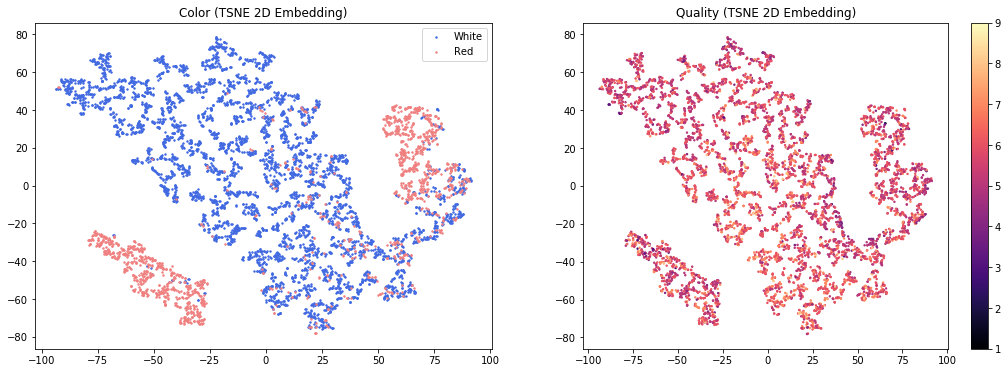

In [25]:
plot_wine(tsne_embed,y['color'],y['quality']) # plot 2D embedding of the wine dataset

In [26]:
def plot_DAC(tsne_embed, y_hard, colors, qualities, n_clusters):
    
    fig = plt.figure(figsize=(20,6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    for i in range(n_clusters):
        #all_poss=['*','H','d','1','.','|','+','x']
        all_poss=["$0$","$1$","$2$","$3$","$4$","$5$","$6$","$7$"]
        mask = y_hard == i
        tsne_embed_0 = tsne_embed[:,0].reshape(-1,1)[mask]
        tsne_embed_1 = tsne_embed[:,1].reshape(-1,1)[mask]
        q = qualities[mask]
        white = (colors == 'white')[mask]
        red = (colors == 'red')[mask]
        tsne_embed_white_0 = tsne_embed_0[white]
        tsne_embed_white_1 = tsne_embed_1[white]
        tsne_embed_red_0 = tsne_embed_0[red]
        tsne_embed_red_1 = tsne_embed_1[red]

        ax1.scatter(tsne_embed_white_0,tsne_embed_white_1,s=30, c='royalblue', label='White',marker = all_poss[i])
        ax1.scatter(tsne_embed_red_0, tsne_embed_red_1,s=30, c='lightcoral', label='Red', marker= all_poss[i])

        quality_plot = ax2.scatter(tsne_embed_0, tsne_embed_1,s=30, c=q, cmap='plasma',
                                   marker=all_poss[i])

    ax1.set_title('Color (TSNE 2D Embedding) n_clusters: '+ str(n_clusters) )
    ax1.legend()
    ax2.set_title('Quality (TSNE 2D Embedding) n_clusters: '+ str(n_clusters))
    fig.colorbar(quality_plot,ax=ax2)
    plt.show()  

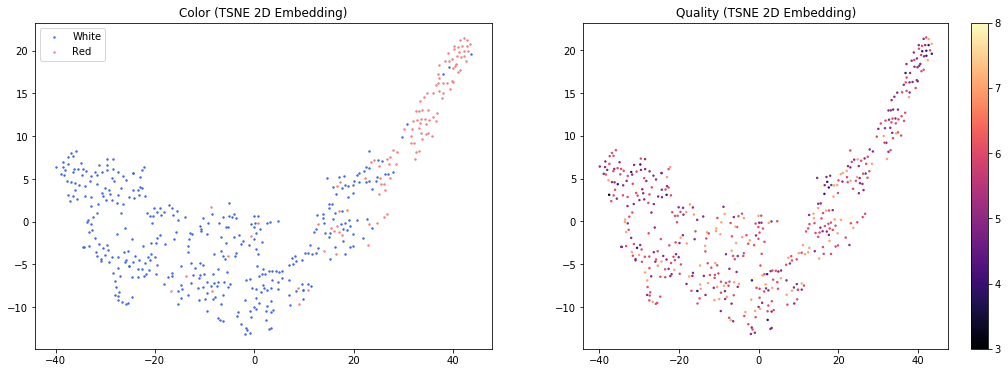

In [27]:
# First we plot the 2D embedding of X_test
tsne_embed_test = tsne.fit_transform(X_test)
plot_wine(tsne_embed_test,y_test,y_test_q)

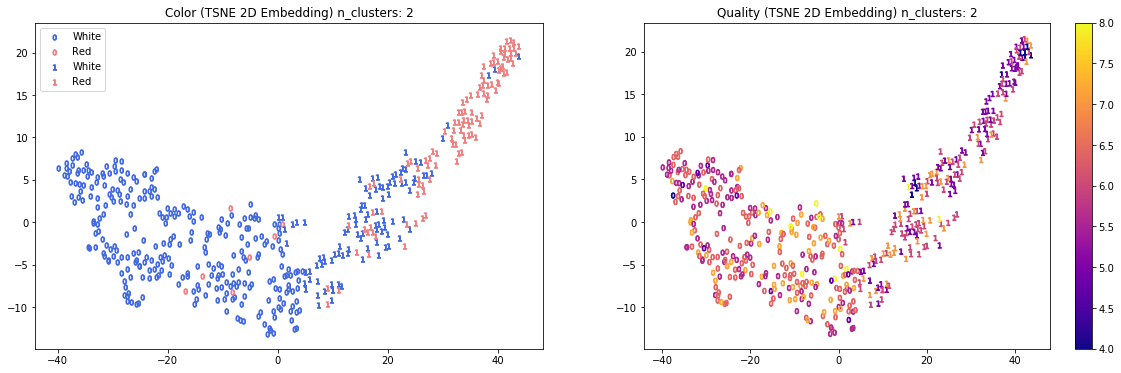

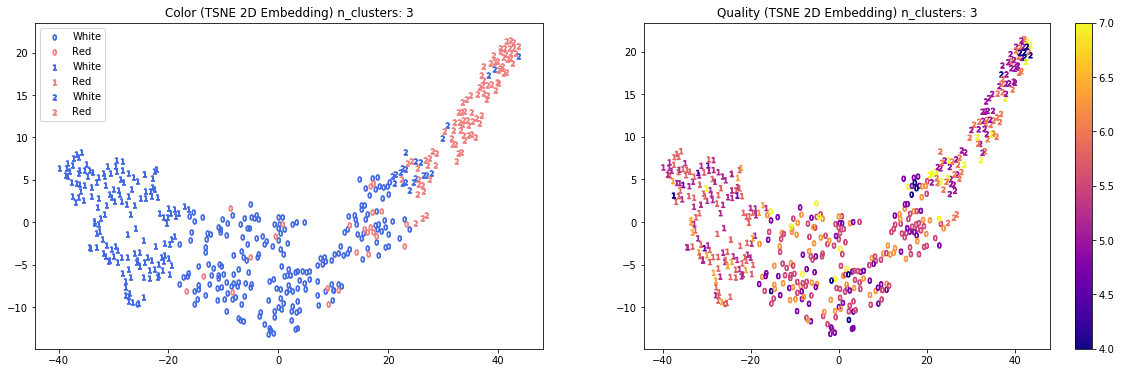

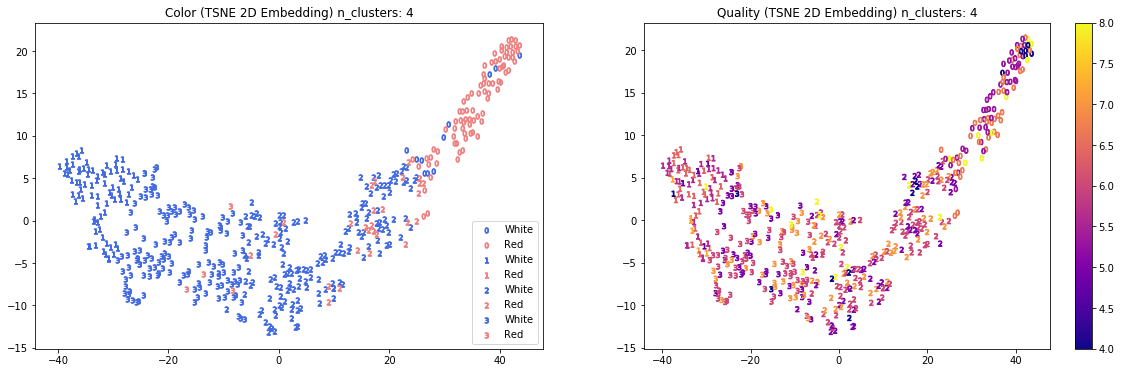

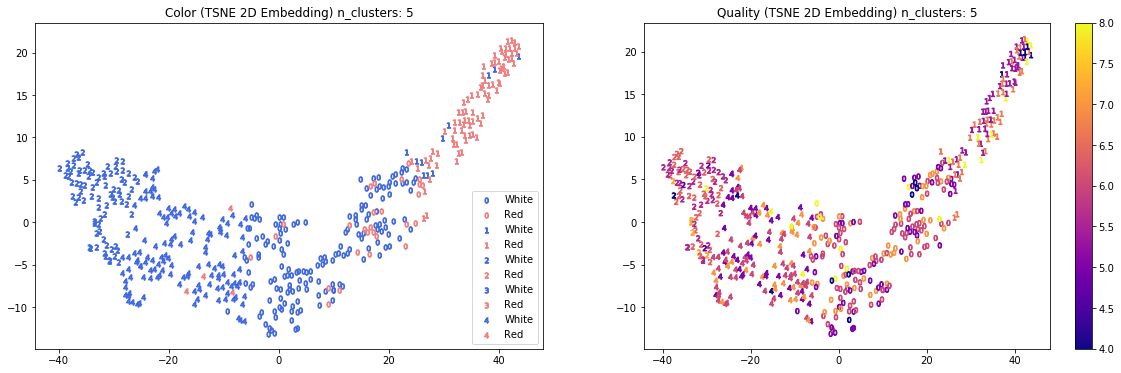

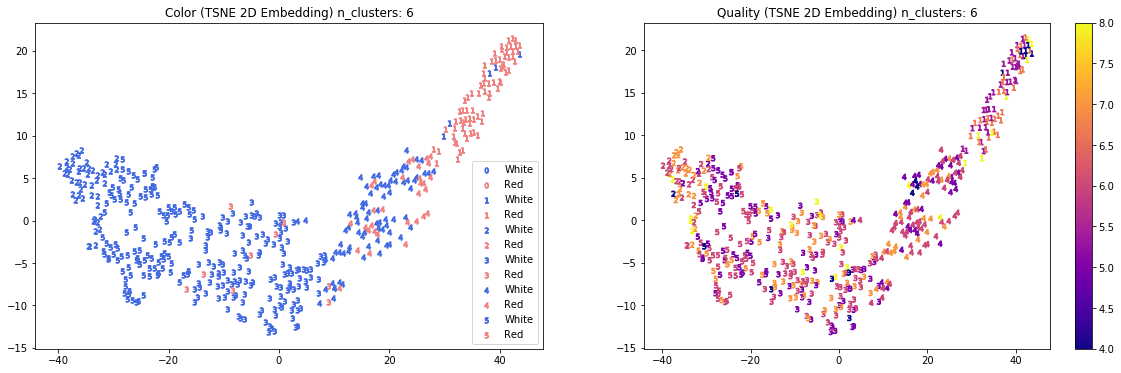

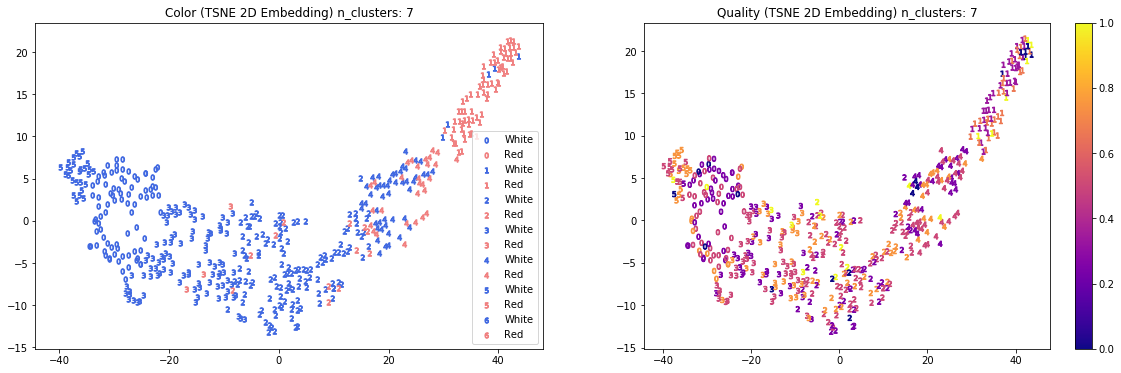

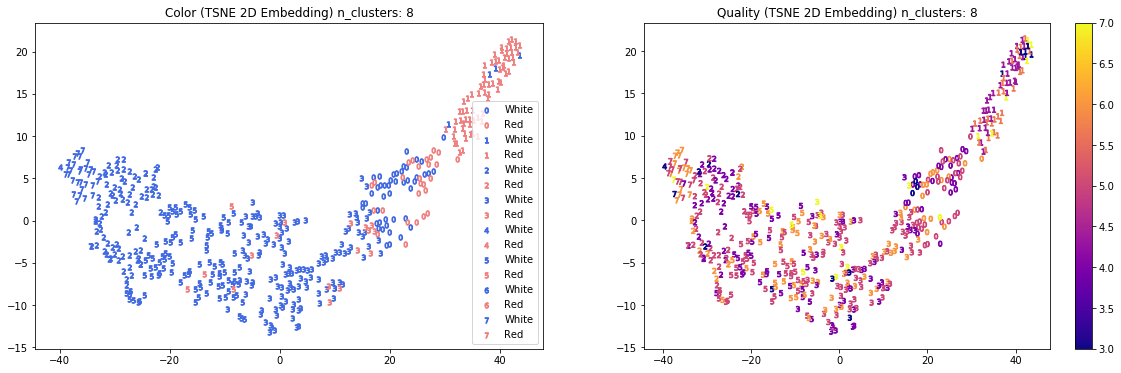

In [28]:
# Now  we compare our clusters with the ground truth for n_clusters=2 to n_clusters=8
import warnings
warnings.filterwarnings(action='ignore') # annoying warning about svm scale parameter 

svm_scores = []
for n in range(2,9):
    DAC = DeterministicAnnealingClustering(n_clusters=n, random_state=42, convergence_em=1e-4,alpha=0.9,T_min=220)
    DAC.fit(X_train)
    X_train_DAC = DAC.transform(X_train)
    svm_DAC = svm.SVC(random_state=42) 
    svm_DAC.fit(X_train_DAC, y_train)
    svm_scores.append((n, svm_DAC.score(DAC.transform(X_test), y_test))) # plot svm score vs n_cluster
    y_hard = np.argmax(DAC.predict(X_test),axis=1)
    plot_DAC(tsne_embed_test, y_hard, y_test,y_test_q,n_clusters=n) # plot cluster vs ground truth
    

    
svm_scores = np.array(svm_scores)

Text(0.5, 1.0, 'SVM Scores vs n_clusters')

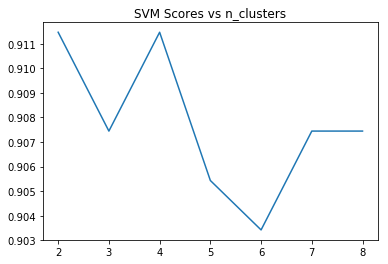

In [29]:
# We plot SVM Scores as a function of the number of clusters
# Peak at n=2 and n=4

plt.plot(svm_scores[:,0],svm_scores[:,1])
plt.title("SVM Scores vs n_clusters")

<ul style="background-color:#adebad;">
        <li>
            So far, our implementation of DAC assumed that our data is compatible with the euclidian metric. Argue why this assumption is not justified for the wine-data. Suggest a better alternative (no implementation required!).
        </li>
    </ul>
</p>



The main problem with this assumption is that the wine-data features are not absolute measurements but rather ratio-scale measurements. The euclidean metric is not compatible with these measurements since it is not scale-invariant. Therefore, it might be interesting to explore other metrics that are not affected by scale (a weighted euclidean distance for example); however, the downside is that there might be no closed form solution if we abandon the euclidean metric.